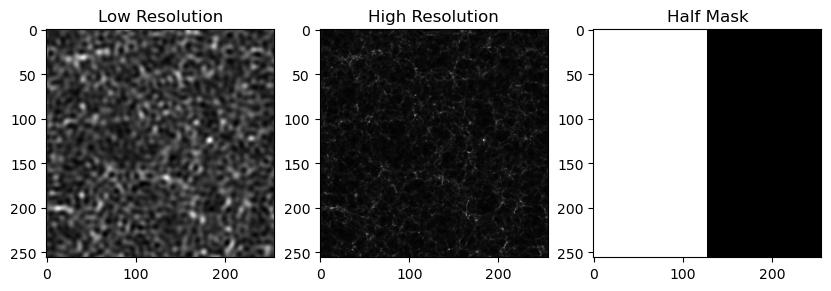

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

lr_image = '../matter-density-superresolution/test/lr/1-100.png'
hr_image = '../matter-density-superresolution/test/hr/1-100.png'
half_mask = '../matter-density-superresolution/genhalf_mask/000000.png'

def pil_loader(path):
    return Image.open(path).convert('RGB')

# Load images using numpy
lr = pil_loader(lr_image)
hr = pil_loader(hr_image)
half_mask = pil_loader(half_mask)

# Plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(lr)[:,:,0], cmap='gray')
plt.title('Low Resolution')
plt.subplot(1, 3, 2)
plt.imshow(np.array(hr)[:,:,0], cmap='gray')
plt.title('High Resolution')
plt.subplot(1, 3, 3)
plt.imshow(half_mask)
plt.title('Half Mask')

plt.show()

In [6]:
%run run_inpaint.py -gpu '0' --lr-img-path '../matter-density-superresolution/test/lr/1-100.png' --hr-img-path '../matter-density-superresolution/test/hr/1-100.png' --mask-path '../matter-density-superresolution/genhalf_mask/000000.png' --num-inference-steps 100 --jump-length 10 --jump-n-sample 10 -c 'config/superresolution.json'

export CUDA_VISIBLE_DEVICES=0


/home/jshenouda/physics-diffusion/Palette-Image-to-Image-Diffusion-Models/run_inpaint.py:106: UserWarning: You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True
  warnings.warn('You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True')


Assuming image size is [256, 256]


sampling loop time steps: 100%|██████████| 1720/1720 [00:32<00:00, 52.94it/s]


In [7]:
half_mask = np.array(half_mask)[:,:,0] // np.max(np.array(half_mask))


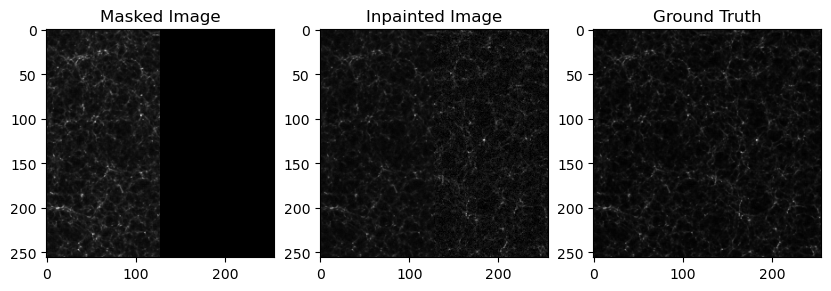

In [8]:
inpaint_img = x_t.squeeze().detach().cpu().numpy()
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(hr)[:,:,0]*half_mask, cmap='gray')
plt.title('Masked Image')

plt.subplot(1, 3, 2)
plt.imshow(inpaint_img, cmap='gray')
plt.title('Inpainted Image')

plt.subplot(1, 3, 3)
plt.imshow(np.array(hr)[:,:,0], cmap='gray')
plt.title('Ground Truth')
plt.show()

In [10]:
np.array(hr)[:,:,0]*half_mask

array([[ 8,  9, 12, ...,  0,  0,  0],
       [14, 14, 14, ...,  0,  0,  0],
       [13, 13, 12, ...,  0,  0,  0],
       ...,
       [17, 18, 10, ...,  0,  0,  0],
       [16,  8,  6, ...,  0,  0,  0],
       [ 8,  7,  6, ...,  0,  0,  0]], dtype=uint8)

In [11]:
np.array(hr)[:,:,0]

array([[ 8,  9, 12, ..., 12, 18, 12],
       [14, 14, 14, ..., 25, 36, 18],
       [13, 13, 12, ..., 25, 24, 10],
       ...,
       [17, 18, 10, ...,  8,  9,  8],
       [16,  8,  6, ...,  9,  8,  7],
       [ 8,  7,  6, ..., 10, 12, 11]], dtype=uint8)